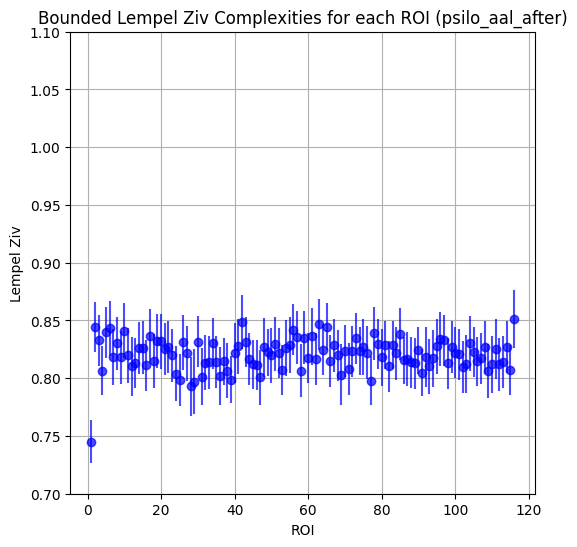

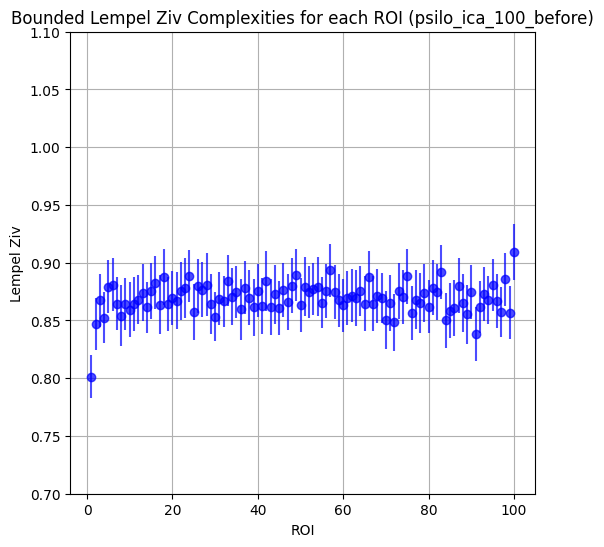

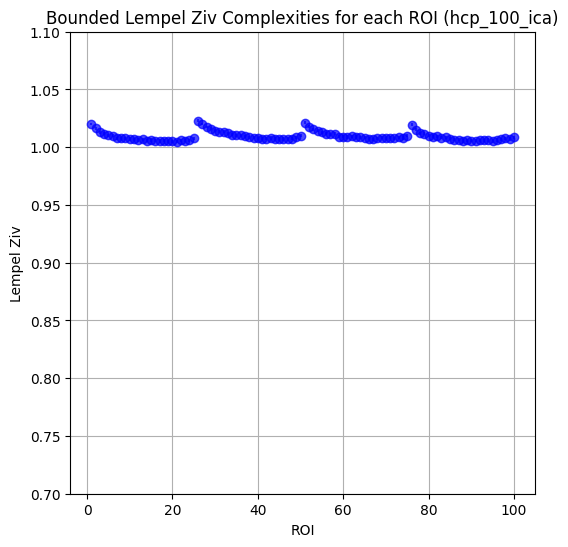

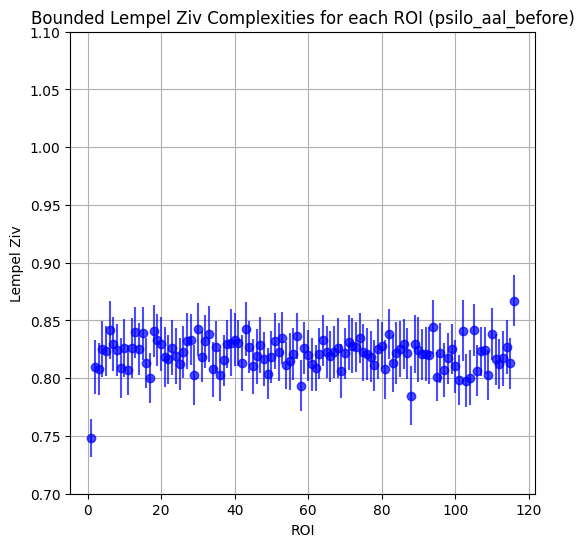

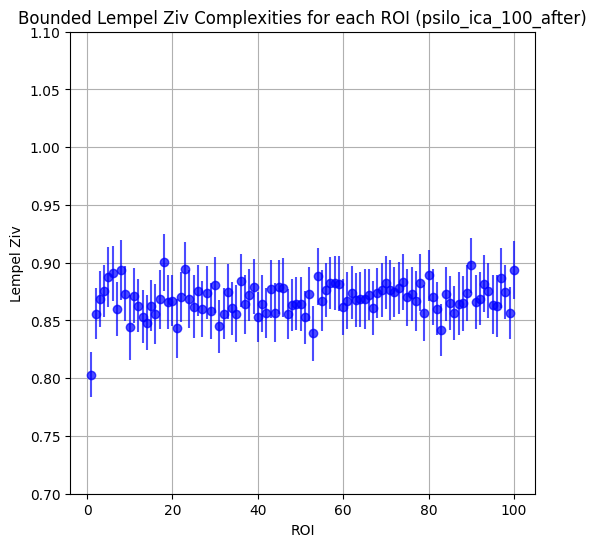

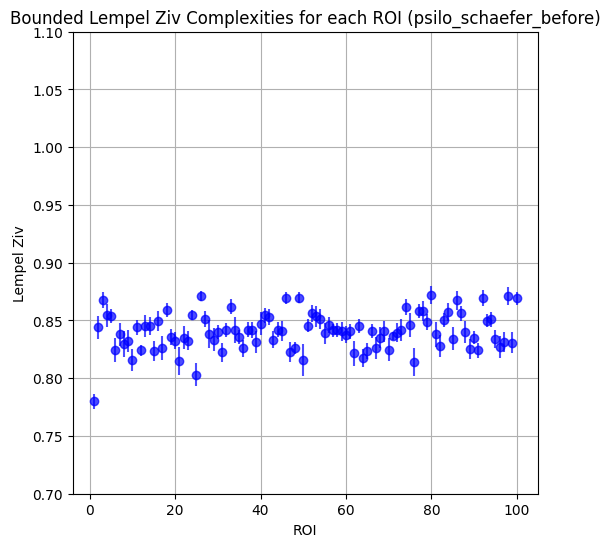

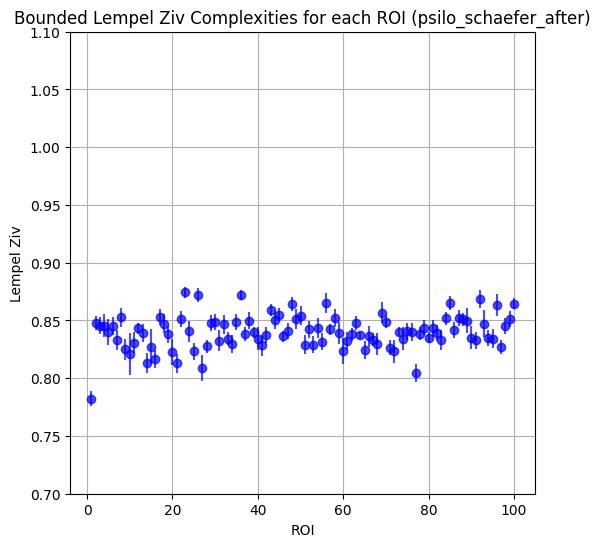

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('../')
from utils import project_root

dirs = []
root = project_root()

for dirpath, dirnames, filenames in os.walk(os.path.join(root, 'lempel_ziv')):
    for dirname in dirnames:
        # Construct the full path to the subdirectory
        subdirectory_path = os.path.join(dirpath, dirname)
        dirs.append(subdirectory_path)
        
for sub in dirs:
    if not ('psilo' in sub.split("/")[-1] or 'hcp' in sub.split("/")[-1]):
        continue
    num_rois = 116 if 'aal' in sub else 100
    n = len(os.listdir(sub))
    x = np.zeros((n, num_rois))

    # Iterate over files in the directory
    for i, filename in enumerate(os.listdir(sub)):
        if filename.endswith('.csv'):  # Check if the file has a .csv extension
            file_path = os.path.join(sub, filename)
            data = np.genfromtxt(file_path, delimiter=',')
            x[i] = data

    # Generate random data for demonstration
    mean_values = np.mean(x, 0)
    variance_values = np.var(x, 0)

    # Create an array of ROI labels
    roi_labels = np.arange(1, num_rois+1)

    # Plotting means and variances
    plt.figure(figsize=(6, 6))
    plt.errorbar(roi_labels, mean_values, yerr=variance_values, fmt='o', color='blue', alpha=0.7)
    plt.xlabel('ROI')
    plt.ylabel('Lempel Ziv')
    plt.title(f'Bounded Lempel Ziv Complexities for each ROI ({sub.split("/")[-1]})')
    plt.ylim(0.7, 1.1)
    plt.grid(True)
    plt.savefig(os.path.join(root, 'images', 'lempel_zivs', f'{sub.split("/")[-1]}.png'), bbox_inches='tight')
    plt.show()
                             
                             